In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("user_behavior_dataset.csv")

In [3]:
data.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
data.shape

(700, 11)

In [5]:
data.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [6]:
data=data.drop(["User ID"],axis=1)

In [7]:
data.dtypes

Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [58]:
def rename_columns(data,new_names):
    data = data.rename(columns=new_names)
    return data
new_column_names={"Device Model":"device_model",
                  "Operating System":"os",
                  "App Usage Time (min/day)":"usage_time",
                 "Screen On Time (hours/day)" : "screen_time_per_hr",
                 "Battery Drain (mAh/day)":"battery_drain",
                 "Number of Apps Installed":"apps",
                 "Data Usage (MB/day)":"data_used",
                 "User Behavior Class":"user_behavior"}
df_renamed = rename_columns(data, new_column_names)

print(df_renamed)

     device_model  os  usage_time  screen_time_per_hr  battery_train  apps  \
0               0   0         393                 6.4           1872    67   
1               1   0         268                 4.7           1331    42   
2               3   0         154                 4.0            761    32   
3               0   0         239                 4.8           1676    56   
4               4   1         187                 4.3           1367    58   
..            ...  ..         ...                 ...            ...   ...   
695             4   1          92                 3.9           1082    26   
696             3   0         316                 6.8           1965    68   
697             0   0          99                 3.1            942    22   
698             2   0          62                 1.7            431    13   
699             1   0         212                 5.4           1306    49   

     data_used  Age  Gender  user_behavior  
0         1122   4

In [60]:
df_renamed.dtypes

device_model            int32
os                      int32
usage_time              int64
screen_time_per_hr    float64
battery_train           int64
apps                    int64
data_used               int64
Age                     int64
Gender                  int32
user_behavior           int64
dtype: object

In [10]:
data=df_renamed

In [11]:
data.dtypes

device_model           object
os                     object
usage_time              int64
screen_time_per_hr    float64
battery_train           int64
apps                    int64
data_used               int64
Age                     int64
Gender                 object
user_behavior           int64
dtype: object

In [12]:
data.device_model.value_counts()

device_model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [13]:
data.os.value_counts()


os
Android    554
iOS        146
Name: count, dtype: int64

In [14]:
data.Gender.value_counts()


Gender
Male      364
Female    336
Name: count, dtype: int64

In [15]:
data.isnull().sum()

device_model          0
os                    0
usage_time            0
screen_time_per_hr    0
battery_train         0
apps                  0
data_used             0
Age                   0
Gender                0
user_behavior         0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()
data["device_model"]=encoder.fit_transform(data["device_model"])
data["os"]=encoder.fit_transform(data["os"])
data["Gender"]=encoder.fit_transform(data["Gender"])




In [18]:
data.dtypes

device_model            int32
os                      int32
usage_time              int64
screen_time_per_hr    float64
battery_train           int64
apps                    int64
data_used               int64
Age                     int64
Gender                  int32
user_behavior           int64
dtype: object

In [19]:
data.head(5)

,device_model,os,usage_time,screen_time_per_hr,battery_train,apps,data_used,Age,Gender,user_behavior
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


In [20]:
data.Age.max()

59

In [21]:
data.Age.min()

18

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


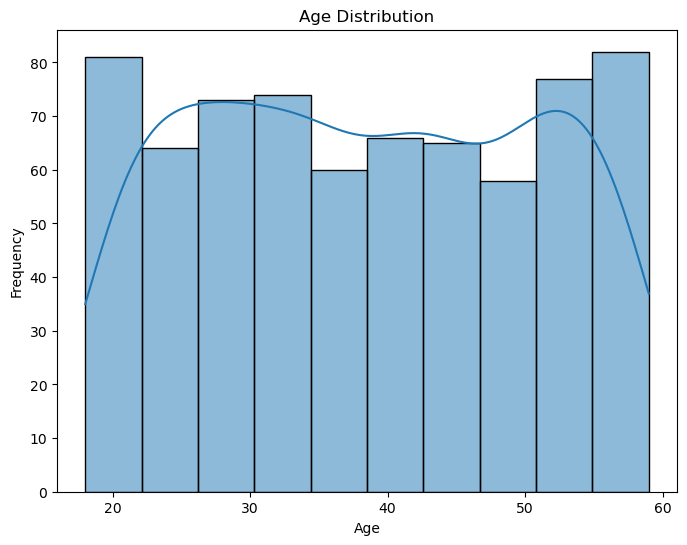

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=10, kde=True)  # kde=True adds a kernel density estimate line
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

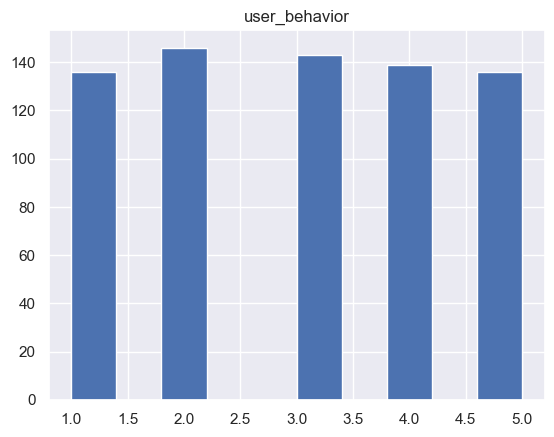

In [23]:
sns.set(style="darkgrid")
data.hist("user_behavior")
plt.show()

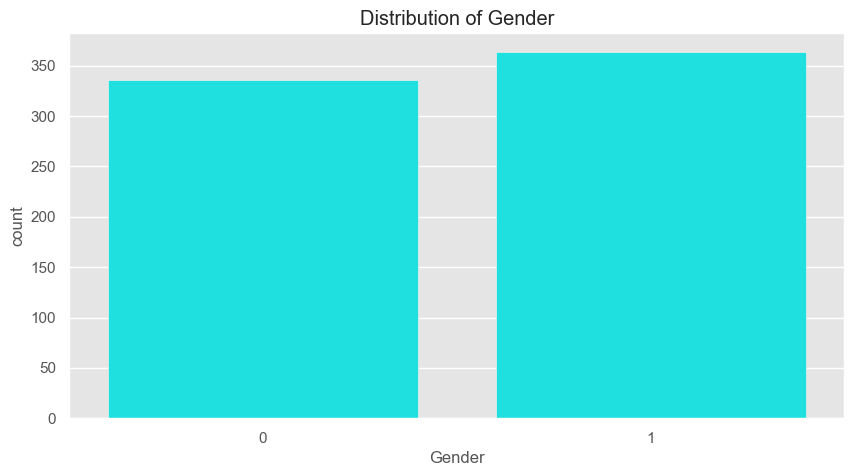

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,color="cyan")
plt.title('Distribution of Gender')
plt.show()

In [25]:
data.apps.min()

10

In [26]:
data.head(5)

,device_model,os,usage_time,screen_time_per_hr,battery_train,apps,data_used,Age,Gender,user_behavior
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


In [27]:
column=["usage_time","screen_time_per_hr","battery_train","apps","data_used"]

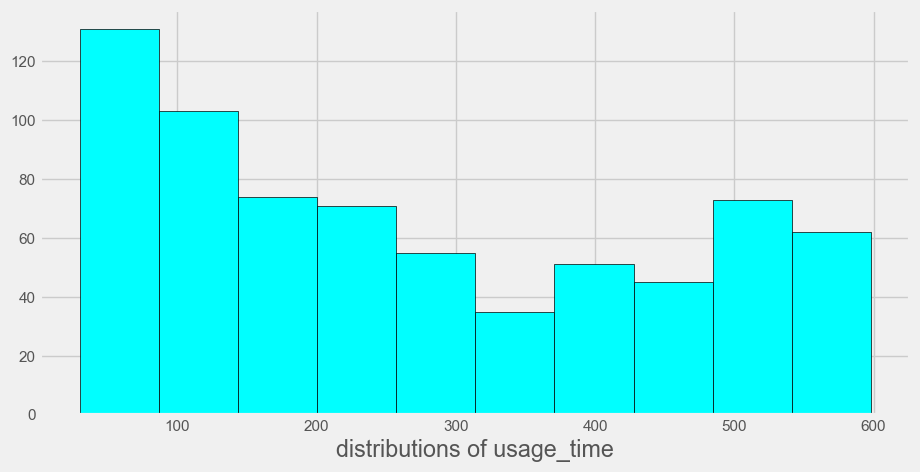

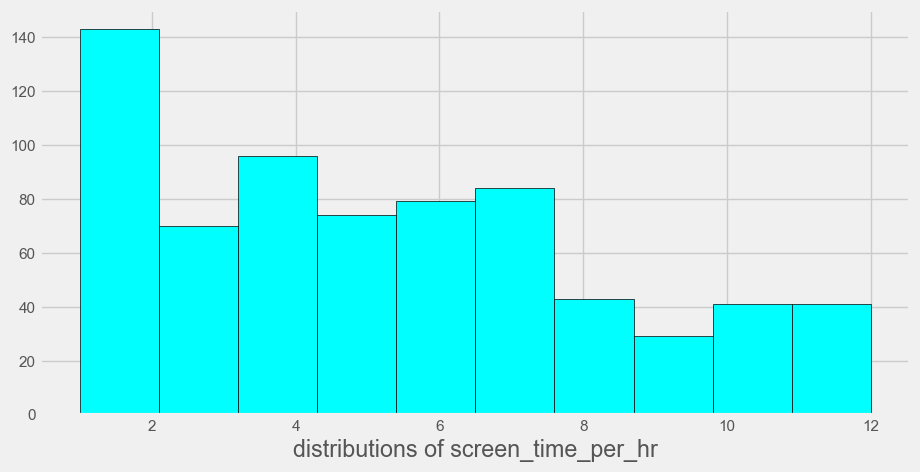

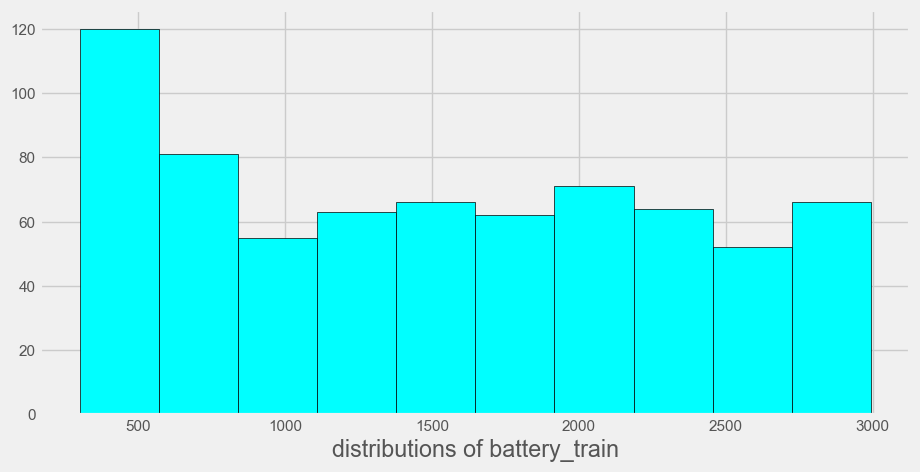

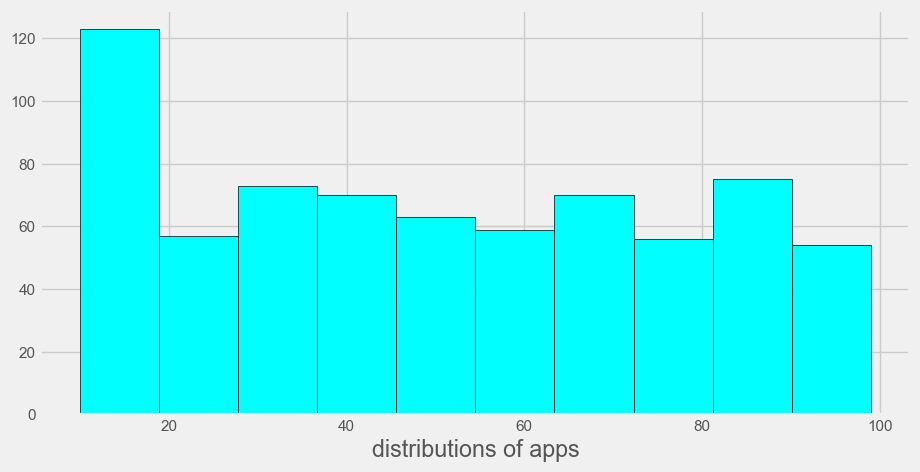

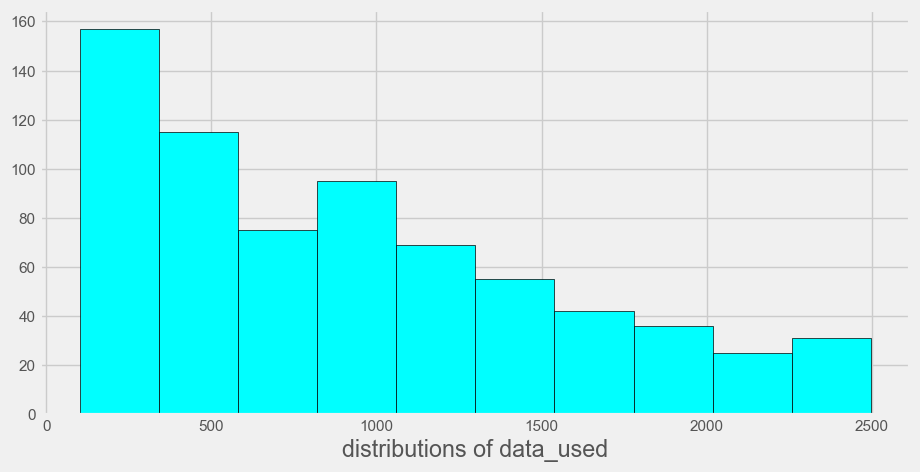

In [28]:
for columns in column:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,5))
    plt.hist(x=columns,data=data,color="cyan",edgecolor="black")
    plt.xlabel(f"distributions of {columns}")
    plt.show()

In [29]:
data.describe()

,device_model,os,usage_time,screen_time_per_hr,battery_train,apps,data_used,Age,Gender,user_behavior
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2.030000,0.208571,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,0.520000,2.990000
std,1.430493,0.406578,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,0.499957,1.401476
min,0.000000,0.000000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,0.000000,1.000000
25%,1.000000,0.000000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,0.000000,2.000000
50%,2.000000,0.000000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,1.000000,3.000000
75%,3.000000,0.000000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,1.000000,4.000000
max,4.000000,1.000000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,1.000000,5.000000


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data.drop('user_behavior',axis=1)),columns=data.columns[:-1])

In [31]:
correlation=data.corr()

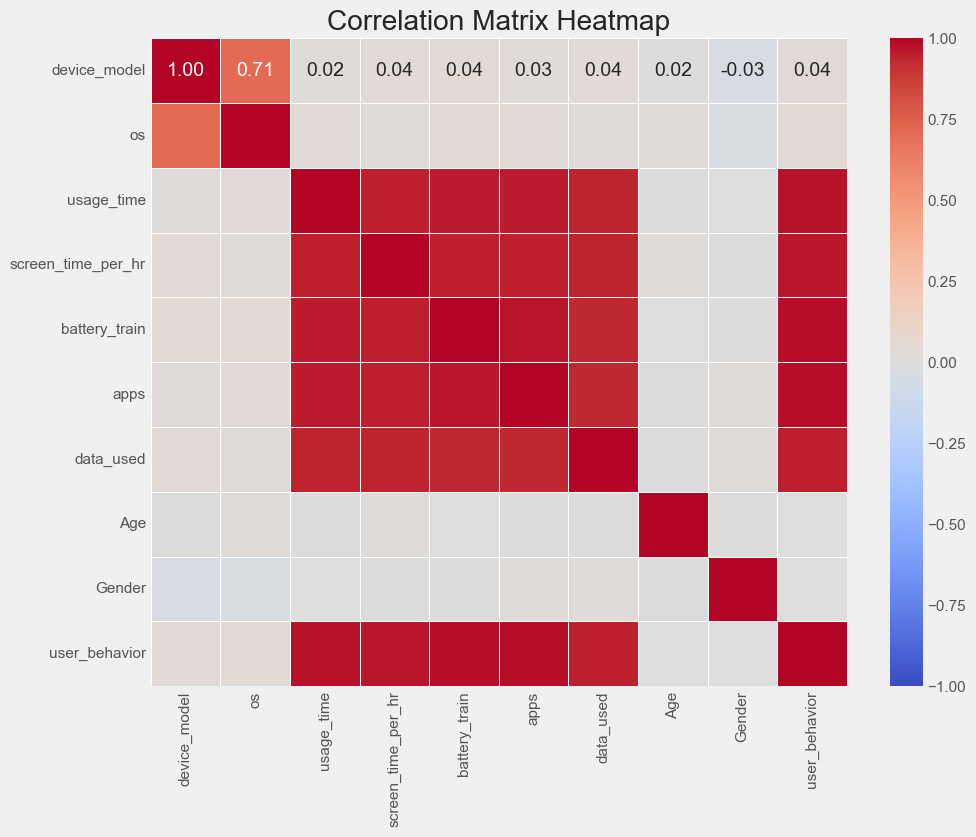

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".02f", cmap='coolwarm',linewidths=0.5,vmin=-1,vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train=data_scaled

In [35]:
y_train=data["user_behavior"]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,random_state=42,test_size=.2)

In [37]:
X_train.shape

(560, 9)

In [38]:
y_train.shape

(560,)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier(),
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")

Logistic Regression: 1.0
K-Nearest Neighbors: 0.9928571428571429
Support Vector Machines: 1.0
Decision Trees: 1.0
Random Forests: 1.0


In [40]:
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

----------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.9929
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.99        34
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        23

    accura

In [41]:
data_scaled.describe()

,device_model,os,usage_time,screen_time_per_hr,battery_train,apps,data_used,Age,Gender
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000,7.000000e+02,7.000000e+02
mean,1.065814e-16,-2.283887e-17,-2.537653e-17,1.776357e-17,9.896845e-17,8.945226e-17,0.000000,6.090366e-17,-2.283887e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715,1.000715e+00,1.000715e+00
min,-1.420106e+00,-5.133594e-01,-1.361748e+00,-1.393402e+00,-1.494297e+00,-1.510969e+00,-1.293360,-1.706289e+00,-1.040833e+00
25%,-7.205466e-01,-5.133594e-01,-8.916023e-01,-9.042272e-01,-9.808900e-01,-9.167049e-01,-0.869919,-8.732562e-01,-1.040833e+00
50%,-2.098679e-02,-5.133594e-01,-2.463877e-01,-1.215482e-01,-2.768132e-02,-6.245075e-02,-0.166006,-4.022357e-02,9.607689e-01
75%,6.785730e-01,-5.133594e-01,9.212107e-01,6.937424e-01,8.604734e-01,8.660864e-01,0.642595,8.761123e-01,9.607689e-01
max,1.378133e+00,1.947953e+00,1.845971e+00,2.193877e+00,1.793219e+00,1.794623e+00,2.448862,1.709145e+00,9.607689e-01


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_['n_neighbors'])

Best k: 1


In [48]:


from sklearn.pipeline import Pipeline

# 1. Logistic Regression
logreg_params = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear']  # Liblinear supports l2
}
logreg_pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])

# 2. K-Nearest Neighbors
knn_params = {
    'knn__n_neighbors': list(range(1, 21)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# 3. Support Vector Machines (SVM)
svm_params = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# 4. Decision Trees
tree_params = {
    'decision_tree__max_depth': [None, 10, 20, 30],
    'decision_tree__min_samples_split': [2, 10, 20],
    'decision_tree__min_samples_leaf': [1, 5, 10]
}
tree_pipeline = Pipeline([('scaler', StandardScaler()), ('decision_tree', DecisionTreeClassifier())])

# 5. Random Forest
rf_params = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 10, 20],
    'random_forest__min_samples_leaf': [1, 5, 10]
}
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('random_forest', RandomForestClassifier())])

# Create a list of all models and their parameter grids
models_and_params = [
    (logreg_pipeline, logreg_params),
    (knn_pipeline, knn_params),
    (svm_pipeline, svm_params),
    (tree_pipeline, tree_params),
    (rf_pipeline, rf_params)
]

# GridSearch for each model
for pipeline, params in models_and_params:
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {pipeline.steps[-1][0]}: {grid_search.best_params_}")
    print(f"Best accuracy for {pipeline.steps[-1][0]}: {grid_search.best_score_}")


Best parameters for logreg: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best accuracy for logreg: 0.8232142857142858
Best parameters for knn: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Best accuracy for knn: 1.0
Best parameters for svc: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best accuracy for svc: 1.0
Best parameters for decision_tree: {'decision_tree__max_depth': None, 'decision_tree__min_samples_leaf': 5, 'decision_tree__min_samples_split': 20}
Best accuracy for decision_tree: 1.0
Best parameters for random_forest: {'random_forest__max_depth': None, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}
Best accuracy for random_forest: 1.0


In [49]:
from sklearn.model_selection import cross_val_score
X,y=X_train,y_train
# Models with best parameters
logreg = LogisticRegression(C=10, penalty='l2', solver='liblinear')
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform')
svc = SVC(C=0.1, gamma='scale', kernel='linear')
decision_tree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10)

# Perform cross-validation
cv = 5  # You can change this to 10 for 10-fold CV

# Logistic Regression
logreg_scores = cross_val_score(logreg, X, y, cv=cv)
print(f'Logistic Regression CV accuracy: {logreg_scores.mean():.4f} (+/- {logreg_scores.std():.4f})')

# KNN
knn_scores = cross_val_score(knn, X, y, cv=cv)
print(f'KNN CV accuracy: {knn_scores.mean():.4f} (+/- {knn_scores.std():.4f})')

# SVC
svc_scores = cross_val_score(svc, X, y, cv=cv)
print(f'SVC CV accuracy: {svc_scores.mean():.4f} (+/- {svc_scores.std():.4f})')

# Decision Tree
decision_tree_scores = cross_val_score(decision_tree, X, y, cv=cv)
print(f'Decision Tree CV accuracy: {decision_tree_scores.mean():.4f} (+/- {decision_tree_scores.std():.4f})')


Logistic Regression CV accuracy: 0.8232 (+/- 0.0214)
KNN CV accuracy: 1.0000 (+/- 0.0000)
SVC CV accuracy: 1.0000 (+/- 0.0000)
Decision Tree CV accuracy: 0.9982 (+/- 0.0036)


In [50]:
logreg = LogisticRegression(C=10, penalty='l2', solver='liblinear').fit(X_train, y_train)
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform').fit(X_train, y_train)
svc = SVC(C=0.1, gamma='scale', kernel='linear').fit(X_train, y_train)
decision_tree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10).fit(X_train, y_train)

# Evaluate on the test set

# Logistic Regression
logreg_pred = logreg.predict(X_test)
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, logreg_pred):.4f}")
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, logreg_pred)}\n")

# KNN
knn_pred = knn.predict(X_test)
print(f"KNN Test Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Classification Report for KNN:\n{classification_report(y_test, knn_pred)}\n")

# SVC
svc_pred = svc.predict(X_test)
print(f"SVC Test Accuracy: {accuracy_score(y_test, svc_pred):.4f}")
print(f"Classification Report for SVC:\n{classification_report(y_test, svc_pred)}\n")

# Decision Tree
decision_tree_pred = decision_tree.predict(X_test)
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, decision_tree_pred):.4f}")
print(f"Classification Report for Decision Tree:\n{classification_report(y_test, decision_tree_pred)}\n")

Logistic Regression Test Accuracy: 0.8286
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.90      0.90      0.90        29
           3       0.68      0.62      0.65        34
           4       0.65      0.74      0.69        27
           5       1.00      0.96      0.98        23

    accuracy                           0.83       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.83      0.83      0.83       140


KNN Test Accuracy: 1.0000
Classification Report for KNN:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                          

In [51]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g., Random Forests)
best_model =SVC(C=0.1, gamma='scale', kernel='linear').fit(X_train, y_train)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

Selected features: Index(['usage_time', 'screen_time_per_hr', 'battery_train', 'apps'], dtype='object')
Feature ranks: [5 6 1 1 1 1 2 3 4]
CPU times: total: 922 ms
Wall time: 961 ms


In [52]:
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'user_behavior' in selected_features_list:
    selected_features_list.remove('user_behavior')

# Create new dataframes with only the selected features
X_train_selected = X_train[selected_features_list]
X_test_selected = X_test[selected_features_list]

In [53]:
best_model=best_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 1.0


In [54]:
import json
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

In [55]:
import joblib

# Assuming the model is trained already
model = SVC(C=1.0, kernel='rbf', probability=True)  # Add probability=True to get probability predictions
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

In [56]:
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

In [59]:
data.dtypes

device_model            int32
os                      int32
usage_time              int64
screen_time_per_hr    float64
battery_train           int64
apps                    int64
data_used               int64
Age                     int64
Gender                  int32
user_behavior           int64
dtype: object

In [62]:
data.device_model.value_counts()

device_model
3    146
4    146
0    142
1    133
2    133
Name: count, dtype: int64

In [63]:
data.os.value_counts()

os
0    554
1    146
Name: count, dtype: int64